# Python examples


## Creates

- createUser
- createMarket
- createTrade

### Create user

Creates a new user. Returns signature and verify keys.

~~~~
baseurl = 'https://https://blocmarket.herokuapp.com/'
url = baseurl +'createUser'
headers = {'content-type': 'application/json'}
content = {}
response = requests.post(url, data=json.dumps(content), headers=headers)
~~~~

Example return as json:

~~~~
{'signingKey_hex': '0cca0a3739eba76cc78823d9f6e898379014d8c53172f5e45c171a3c54a9f477',
 'traderId': '1',
 'verifyKey_hex': 'cdcfb59431b2579a681cee65656cbed6f8d578d5cc30d3e759e86c1d3e3529ef'}
~~~~
        
### Create/update market

Creates/updates a market. Returns True and market details if successful. 

Specify:
- Market root and branch id
- Minimum and maximum outcomes
- Trader Id
- Sign and verify keys

Note that sending the private key is a terrible idea. In production signing is done on client side.

~~~~
sk = '0cca0a3739eba76cc78823d9f6e898379014d8c53172f5e45c171a3c54a9f477'
vk = 'cdcfb59431b2579a681cee65656cbed6f8d578d5cc30d3e759e86c1d3e3529ef'
tId = 2

content_makemarket = {"signingKey_hex": sk,
                    "traderId": tId, 
                    "verifyKey_hex": vk,
                    "marketRootId": 1, 
                    "marketBranchId": 1, 
                    "marketMin": 0,
                    "marketMax":1}

response = requests.post(url, data=json.dumps(content_makemarket), headers=headers)
~~~~

Example return as json:

~~~~
{'checks': 'True',
 'marketBranchId': 1,
 'marketMax': 1,
 'marketMin': 0,
 'marketRootId': 1,
 'traderId': '2'}
~~~~
    
### Create trade

Create a trade. Returns True and trade details if successful.

Specify:

- Trader Id
- Market Id
- Price
- Quantity
- Sign and verify keys

~~~~
url = baseurl+'createTrade'

content_maketrade = {"signingKey_hex": sk,
                     "traderId": tId,
                     "verifyKey_hex": vk,
                     "marketId": mkId,
                     "price": 0.55,
                     "quantity":1}

response = requests.post(url, data=json.dumps(content_maketrade), headers=headers)
~~~~

Example return as json:
~~~~
{'checks': 'True',
 'marketId': 1,
 'price': 0.55,
 'quantity': -1,
 'traderId': '2'}
~~~~

## Views

- viewMarketBounds
- viewOrderBook
- viewOpenTrades
- viewMatchedTrades

### View markets

~~~~
url = baseurl+'viewMarketBounds'
content = {}
response = requests.post(url, data=json.dumps(content), headers=headers)
~~~~

Example response as json:

~~~~
'{"marketId":{"0":1,"1":2,"2":3,"3":4},"marketRootId":{"0":1,"1":2,"2":3,"3":4},"marketBranchId":{"0":1,"1":1,"2":1,"3":1},"marketMin":{"0":0.0,"1":0.0,"2":0.0,"3":0.0},"marketMax":{"0":0.7,"1":0.7,"2":0.7,"3":0.7}}'
~~~~

### View full order book

~~~~
url = baseurl+'viewOrderBook'
content = {}
response = requests.post(url, data=json.dumps(content), headers=headers)
~~~~

Example response as json:

~~~~
'{"marketId":{"0":1,"1":1,"2":1},"price":{"0":0.55,"1":0.55,"2":0.55},"quantity":{"0":1.0,"1":-1.0,"2":-1.0},"traderId":{"0":1,"1":1,"2":1},"iMatched":{"0":true,"1":true,"2":true},"timeStampUTC":{"0":1547976585838,"1":1547976602766,"2":1547976613155}}'
~~~~

### View open trades

~~~~
url = baseurl+'viewOpenTrades'
content = {}
response = requests.post(url, data=json.dumps(content), headers=headers)
~~~~

~~~~
'{"marketId":{"12":1,"15":1,"18":1,"21":1,"24":1},"price":{"12":0.43,"15":0.43,"18":0.43,"21":0.43,"24":0.43},"quantity":{"12":-1.0,"15":-1.0,"18":-1.0,"21":-1.0,"24":-1.0},"traderId":{"12":1,"15":1,"18":1,"21":1,"24":1},"timeStampUTC":{"12":1547976742476,"15":1547976750344,"18":1547976758683,"21":1547976768968,"24":1547976775537}}'
~~~~

### View matched trades

~~~~
url = baseurl+'viewMatchedTrades'
content = {}
response = requests.post(url, data=json.dumps(content), headers=headers)
~~~~

Example response as json:

~~~~
'{"marketId":{"0":1,"1":1},"price":{"0":0.43,"1":0.55},"quantity":{"0":0.0,"1":0.0},"traderId":{"0":1,"1":1}}'

~~~~

### View trader summary

A view joining order book and marketTable for a particular trader.

~~~~
url = baseurl+'viewTradeSummary'
content = {'traderId': 2}
response = requests.post(url, data=json.dumps(content), headers=headers)
~~~~

Example response as json:

~~~~
'{"marketId":{"0":1,"1":1},"price":{"0":0.8,"1":0.5},"quantity":{"0":-1.0,"1":-1.0},"traderId":{"0":2,"1":2},"iMatched":{"0":false,"1":true},"timeStampUTC":{"0":1547982939316,"1":1547982938964},"marketMin":{"0":0.0,"1":0.0},"marketMax":{"0":1.0,"1":1.0}}'
~~~~


# Python demonstration

In [4]:
import requests
import json
import numpy as np
import pandas as pd
import time

%matplotlib inline
import matplotlib.pyplot as plt

# Running flask app from powershell
# $env:FLASK_APP = "api"
# $env:FLASK_ENV = "development"
# flask run

# Running flask from terminal on OSX
# export FLASK_APP=api
# export FLASK_ENV=development
# flask run

# Running with gunicorn (heroku, digitalocean, etc):
# Procfile >
# web: gunicorn wsgi --log-file -
# wsgi.py >
# from api import app as application
#
#if __name__ == "__main__":
#    application.run()

# https://devcenter.heroku.com/articles/getting-started-with-python
# https://www.digitalocean.com/community/tutorials/how-to-serve-flask-applications-with-gunicorn-and-nginx-on-ubuntu-14-04


In [5]:
#  baseurl = 'https://vast-depths-89393.herokuapp.com/'
# baseurl = 'https://glacial-hollows-90395.herokuapp.com/'
baseurl = 'https://blocmarket.herokuapp.com/'
#baseurl = 'http://127.0.0.1:5000/'
# baseurl = 'http://127.0.0.1:7000/'

In [6]:
url = baseurl +'createUser'
headers = {'content-type': 'application/json'}
content = {}
response = requests.post(url, data=json.dumps(content), headers=headers)

In [7]:
response.json()

{'signingKey_hex': '5e64782b3c98f4a9911936cbdd1333dd65a8aa5a118937beab1274ec12ced48f',
 'traderId': '2',
 'verifyKey_hex': '6926d4c26539eb30ffd5ac8a83565bf20c680196de8df26326216adf0a05dfa1'}

In [8]:
url = baseurl + 'createMarket'

mkRtId = 7
mkId=1
# copy from response
sk = response.json()['signingKey_hex']
vk = response.json()['verifyKey_hex']
tId = response.json()['traderId']

In [9]:
content_makemarket = {"signingKey_hex": sk,
                    "traderId": int(tId), 
                    "verifyKey_hex": vk,
                    "marketRootId": mkRtId, 
                    "marketBranchId": 1, 
                    "marketMin": 0.1,
                    "marketMax":0.9}

response = requests.post(url, data=json.dumps(content_makemarket), headers=headers)

In [10]:
response.json()

{'allChecks': "{'marketId': '1', 'marketRangeChk': True, 'sigChk': True, 'chainChk': True, 'ownerChk': False, 'timeChk': True}",
 'checks': 'False',
 'marketBranchId': 1,
 'marketId': 1,
 'marketMax': 0.9,
 'marketMin': 0.1,
 'marketRootId': 7,
 'traderId': 2}

In [11]:
# Save market id from response
mkId = response.json()['marketId']


In [12]:
pd.DataFrame(response.json(), index=[0])

,allChecks,checks,marketBranchId,marketId,marketMax,marketMin,marketRootId,traderId
0,"{'marketId': '1', 'marketRangeChk': True, 'sig...",False,1,1,0.9,0.1,7,2


In [13]:
# Create a trade
url = baseurl+'createTrade'

content_maketrade = {"signingKey_hex": sk,
                     "traderId": int(tId),
                     "verifyKey_hex": vk,
                     "marketId": mkId,
                     "price": 0.55,
                     "quantity":1}
# Post trade
response = requests.post(url, data=json.dumps(content_maketrade), headers=headers)

In [1905]:
response.json()

{'allChecks': "{'marketChk': True, 'sigChk': True, 'chainChk': True, 'timeChk': True, 'colChk': True}",
 'checks': 'True',
 'marketId': 1,
 'price': 0.55,
 'quantity': 1,
 'traderId': 1}

In [1801]:
# View json response
pd.DataFrame(response.json(), index=[0])


,allChecks,checks,marketId,price,quantity,traderId
0,"{'marketChk': True, 'sigChk': True, 'chainChk'...",True,3,0.55,1,5


In [1802]:
# Create a matched trade
url = baseurl+'createTrade'
content_maketrade['quantity'] = -1
response = requests.post(url, data=json.dumps(content_maketrade), headers=headers)

In [1803]:
response.json()

{'allChecks': "{'marketChk': True, 'sigChk': True, 'chainChk': True, 'timeChk': True, 'colChk': True}",
 'checks': 'True',
 'marketId': 3,
 'price': 0.55,
 'quantity': -1,
 'traderId': 5}

In [1804]:
# Create many matched trades
url = baseurl+'createTrade'

for i in range(5):
    t = time.time()
    content_maketrade['quantity'] = -1
    response = requests.post(url, data=json.dumps(content_maketrade), headers=headers)
    content_maketrade['quantity']=1
    response = requests.post(url, data=json.dumps(content_maketrade), headers=headers)
    print('matched trade: ' + str(i) + ' in ' + str(time.time() - t) + ' seconds.')


matched trade: 0 in 5.401496648788452 seconds.
matched trade: 1 in 5.881103038787842 seconds.
matched trade: 2 in 5.988648891448975 seconds.
matched trade: 3 in 5.053702116012573 seconds.
matched trade: 4 in 6.79403018951416 seconds.


In [1755]:
url = baseurl+'createMarket'

for i in range(4):
    t = time.time()

    content_makemarket = {"signingKey_hex": sk,
      "traderId": int(tId), "verifyKey_hex": vk,
      "marketRootId": i+1, "marketBranchId": 1, "marketMin": 0, "marketMax":0.7}

    response = requests.post(url, data=json.dumps(content_makemarket), headers=headers)
    if response.json()['checks'] == 'True':
        print('market created: ' + str(i+1) + ' in ' + str(time.time() - t) + ' seconds.')
    else:
        print('failed to create market ' +str(i+1))
    

market created: 1 in 0.2735402584075928 seconds.
market created: 2 in 0.3729438781738281 seconds.
market created: 3 in 0.6626698970794678 seconds.
market created: 4 in 1.3907649517059326 seconds.


In [1805]:
response.json()

{'allChecks': "{'marketChk': True, 'sigChk': True, 'chainChk': True, 'timeChk': True, 'colChk': True}",
 'checks': 'True',
 'marketId': 3,
 'price': 0.55,
 'quantity': 1,
 'traderId': 5}

In [1806]:
url = baseurl+'viewMarketBounds'
content = {}
response = requests.post(url, data=json.dumps(content), headers=headers)


In [1807]:
a = pd.read_json(response.json())
a

,marketId,marketRootId,marketBranchId,marketMin,marketMax
0,1,1,1,0.01,1.0
1,2,2,1,0.01,1.0
2,3,7,1,0.10,0.9


In [1808]:
url = baseurl+'viewOrderBook'
content = {}
response = requests.post(url, data=json.dumps(content), headers=headers)

In [1809]:
a = pd.read_json(response.json())
a

,marketId,price,quantity,traderId,iMatched,timeStampUTC
0,1,0.50,1,1,False,2019-01-24 23:05:30.670
1,1,0.50,1,1,False,2019-01-24 23:06:00.168
10,3,0.55,1,4,True,2019-01-26 05:46:08.645
11,3,0.55,-1,4,True,2019-01-26 05:46:10.890
12,3,0.55,1,4,True,2019-01-26 05:46:13.053
13,3,0.55,-1,4,True,2019-01-26 05:46:15.419
14,3,0.55,1,4,True,2019-01-26 05:46:18.007
15,3,0.55,-1,4,True,2019-01-26 05:46:20.261
16,3,0.55,1,4,True,2019-01-26 05:46:22.563
17,3,0.55,1,5,True,2019-01-26 05:55:50.324


In [1810]:
# Create many unmatched trades
url = baseurl+'createTrade'

for i in range(5):
    t = time.time()
    content_maketrade['quantity'] = -1
    content_maketrade['price'] = 0.43
    response = requests.post(url, data=json.dumps(content_maketrade), headers=headers)
    print('unmatched trade: ' + str(i) + ' in ' + str(time.time() - t) + ' seconds.')


unmatched trade: 0 in 2.366267204284668 seconds.
unmatched trade: 1 in 2.7218821048736572 seconds.
unmatched trade: 2 in 2.5631229877471924 seconds.
unmatched trade: 3 in 2.261924982070923 seconds.
unmatched trade: 4 in 2.811851978302002 seconds.


In [1811]:
a = response.json()
a

{'allChecks': "{'marketChk': True, 'sigChk': True, 'chainChk': True, 'timeChk': True, 'colChk': True}",
 'checks': 'True',
 'marketId': 3,
 'price': 0.43,
 'quantity': -1,
 'traderId': 5}

In [1812]:
url = baseurl+'viewOpenTrades'

content = {}
response = requests.post(url, data=json.dumps(content), headers=headers)

In [1813]:
pd.read_json(response.json())

,marketId,price,quantity,traderId,timeStampUTC
0,1,0.50,1,1,2019-01-24 23:05:30.670
1,1,0.50,1,1,2019-01-24 23:06:00.168
2,1,0.51,1,1,2019-01-24 23:06:45.494
29,3,0.43,-1,5,2019-01-26 05:57:06.731
3,1,0.51,1,1,2019-01-24 23:09:14.761
30,3,0.43,-1,5,2019-01-26 05:57:09.406
31,3,0.43,-1,5,2019-01-26 05:57:12.007
32,3,0.43,-1,5,2019-01-26 05:57:14.266
33,3,0.43,-1,5,2019-01-26 05:57:17.069
4,1,0.51,1,3,2019-01-24 23:41:11.683


In [1814]:
url = baseurl+'viewMatchedTrades'
content = {}
response = requests.post(url, data=json.dumps(content), headers=headers)

In [1815]:
pd.read_json(response.json())

,marketId,price,quantity,traderId
0,3,0.55,0,4
1,3,0.55,0,5


In [1816]:
# Create many matched trades (own)
url = baseurl+'createTrade'

for i in range(5):
    t = time.time()
    content_maketrade['quantity'] = -1
    response = requests.post(url, data=json.dumps(content_maketrade), headers=headers)
    content_maketrade['quantity']=1
    response = requests.post(url, data=json.dumps(content_maketrade), headers=headers)
    print('matched trade: ' + str(i) + ' in ' + str(time.time() - t) + ' seconds.')


matched trade: 0 in 4.895505905151367 seconds.
matched trade: 1 in 5.781968832015991 seconds.
matched trade: 2 in 4.9718756675720215 seconds.
matched trade: 3 in 4.9721081256866455 seconds.
matched trade: 4 in 5.090298891067505 seconds.


In [1817]:
url = baseurl+'viewTradeSummary'
content = {'traderId': int(tId)}
response = requests.post(url, data=json.dumps(content), headers=headers)

In [1818]:
pd.read_json(response.json())

,marketId,price,quantity,traderId,iMatched,timeStampUTC,marketMin,marketMax,marketMinOutcome,marketMaxOutcome
0,3,0.55,1,5,True,2019-01-26 05:55:50.324,0.1,0.9,-0.45,0.35
1,3,0.55,-1,5,True,2019-01-26 05:56:04.139,0.1,0.9,0.45,-0.35
10,3,0.55,-1,5,True,2019-01-26 05:56:32.244,0.1,0.9,0.45,-0.35
11,3,0.55,1,5,True,2019-01-26 05:56:35.067,0.1,0.9,-0.45,0.35
12,3,0.43,-1,5,False,2019-01-26 05:58:00.963,0.1,0.9,0.33,-0.47
13,3,0.43,-1,5,True,2019-01-26 05:57:06.731,0.1,0.9,0.33,-0.47
14,3,0.43,1,5,True,2019-01-26 05:58:03.202,0.1,0.9,-0.33,0.47
15,3,0.43,-1,5,False,2019-01-26 05:58:05.631,0.1,0.9,0.33,-0.47
16,3,0.43,-1,5,True,2019-01-26 05:57:09.406,0.1,0.9,0.33,-0.47
17,3,0.43,1,5,True,2019-01-26 05:58:08.884,0.1,0.9,-0.33,0.47


In [1819]:
url = baseurl+'getSignedUTCTimestamp'
content = {}
response = requests.get(url, data=json.dumps(content), headers=headers)


In [1820]:
response.json()

{'timeStampUTC': '2019-01-26 05:59:05.359432',
 'timeStampUTCSignature': "b'=\\x8b\\x12\\xb2\\x99\\x96J\\xdf<)/9ql\\x1ac)$\\xefUF\\x8dg\\xd7\\xf3\\x10\\xc4QI\\xd1m\\x1b\\xda\\xd3\\xf3f\\xd0\\x04\\x886\\xe8!K\\x14\\xd7\\x1d\\xad`\\xd7\\xc8g\\xe5\\x97\\xe7\\x08G\\x1du\\xdcSd\\x9c/\\n'",
 'verifyKey': 'cdcfb59431b2579a681cee65656cbed6f8d578d5cc30d3e759e86c1d3e3529ef'}

In [20]:
# A simple bot with an OU process

url = baseurl+'createTrade'

m = 0.5
k = 0.01
v = 0.05
B = m

for i in range(2000):
    # Create bounded random reverting to m, bounded [0,1]
    dW = np.random.normal()
    if i==0:
        dLnB = v*dW
    else:
        dLnB = -k*(np.log(B)-m) + v*dW
    
    # Bound between zero and one
    B *= np.exp(dLnB)
    B = min(max(B, 0.01),0.99)
    
    # Make a bid
    content_maketrade['price'] = B-0.01
    content_maketrade['quantity'] =1
    response = requests.post(url, data=json.dumps(content_maketrade), headers=headers)
    # Make an offer
    content_maketrade['price'] = B+0.01
    content_maketrade['quantity'] = -1
    response = requests.post(url, data=json.dumps(content_maketrade), headers=headers)
    time.sleep(0.1)
    
    # Remove bid
    content_maketrade['price'] = B-0.01
    content_maketrade['quantity'] =-1
    response = requests.post(url, data=json.dumps(content_maketrade), headers=headers)
    # Remove offer
    content_maketrade['price'] = B+0.01
    content_maketrade['quantity'] = 1
    response = requests.post(url, data=json.dumps(content_maketrade), headers=headers)
    print('Price: ' + str(content_maketrade['price']))

Price: 0.505284206493418
Price: 0.528273018548896
Price: 0.5127252077015958
Price: 0.5100893149016863
Price: 0.54145737832597
Price: 0.5655081292993692
Price: 0.5362662730807741
Price: 0.5286663051950292
Price: 0.4916292146639093
Price: 0.5008089653853217


KeyboardInterrupt: 

In [21]:

url = baseurl+'viewTradeSummary'
content = {'traderId': int(tId)}
response = requests.post(url, data=json.dumps(content), headers=headers)
a = pd.read_json(response.json())
a

,marketId,price,quantity,traderId,iMatched,timeStampUTC,marketMin,marketMax,marketMinOutcome,marketMaxOutcome
0,1,0.550000,1,2,False,2019-01-26 08:18:57.148,0.1,0.9,-0.450000,0.350000
1,1,0.485284,1,2,True,2019-01-26 11:49:03.904,0.1,0.9,-0.385284,0.414716
10,1,0.492725,-1,2,True,2019-01-26 11:49:23.134,0.1,0.9,0.392725,-0.407275
11,1,0.512725,-1,2,True,2019-01-26 11:49:21.233,0.1,0.9,0.412725,-0.387275
12,1,0.512725,1,2,True,2019-01-26 11:49:24.902,0.1,0.9,-0.412725,0.387275
13,1,0.490089,1,2,True,2019-01-26 11:49:26.693,0.1,0.9,-0.390089,0.409911
14,1,0.490089,-1,2,True,2019-01-26 11:49:30.411,0.1,0.9,0.390089,-0.409911
15,1,0.510089,-1,2,True,2019-01-26 11:49:28.500,0.1,0.9,0.410089,-0.389911
16,1,0.510089,1,2,True,2019-01-26 11:49:32.211,0.1,0.9,-0.410089,0.389911
17,1,0.521457,1,2,True,2019-01-26 11:49:33.949,0.1,0.9,-0.421457,0.378543


In [1891]:
tId

'5'

In [23]:
a = a.set_index(a['timeStampUTC'])
a



,marketId,price,quantity,traderId,iMatched,timeStampUTC,marketMin,marketMax,marketMinOutcome,marketMaxOutcome
timeStampUTC,,,,,,,,,,
2019-01-26 08:18:57.148,1,0.550000,1,2,False,2019-01-26 08:18:57.148,0.1,0.9,-0.450000,0.350000
2019-01-26 11:49:03.904,1,0.485284,1,2,True,2019-01-26 11:49:03.904,0.1,0.9,-0.385284,0.414716
2019-01-26 11:49:23.134,1,0.492725,-1,2,True,2019-01-26 11:49:23.134,0.1,0.9,0.392725,-0.407275
2019-01-26 11:49:21.233,1,0.512725,-1,2,True,2019-01-26 11:49:21.233,0.1,0.9,0.412725,-0.387275
2019-01-26 11:49:24.902,1,0.512725,1,2,True,2019-01-26 11:49:24.902,0.1,0.9,-0.412725,0.387275
2019-01-26 11:49:26.693,1,0.490089,1,2,True,2019-01-26 11:49:26.693,0.1,0.9,-0.390089,0.409911
2019-01-26 11:49:30.411,1,0.490089,-1,2,True,2019-01-26 11:49:30.411,0.1,0.9,0.390089,-0.409911
2019-01-26 11:49:28.500,1,0.510089,-1,2,True,2019-01-26 11:49:28.500,0.1,0.9,0.410089,-0.389911
2019-01-26 11:49:32.211,1,0.510089,1,2,True,2019-01-26 11:49:32.211,0.1,0.9,-0.410089,0.389911


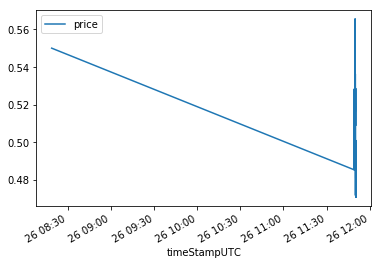

In [24]:
plt.figure(); a['price'].plot(); plt.legend(loc='best')


# Curl examples



## Create user

~~~~
curl --header "Content-Type: application/json" -X POST http://127.0.0.1:7000/createUser
~~~~
        
## Create market

~~~~
curl --data '{"signingKey_hex": "ece2efc138c8298d43caba1315ceda614e20644c74d46fed37871c47ea19afdf",
"traderId": 1, 
"verifyKey_hex": "9690a2e12971ae452d68bf3d08405090d45791533cf80740fd186aea4b6773fc",
"marketRootId": 1, 
"marketBranchId": 5, 
"marketMin": 0, 
"marketMax": 1}' 
--header "Content-Type: application/json" -X POST http://localhost:7000/createMarket
~~~~
    
## Create trade

~~~~
curl --data '{"signingKey_hex": "ece2efc138c8298d43caba1315ceda614e20644c74d46fed37871c47ea19afdf",
"traderId": 1, 
"verifyKey_hex": "9690a2e12971ae452d68bf3d08405090d45791533cf80740fd186aea4b6773fc",
"marketId": 1,
"price": 0.1212,
"quantity": 1}' --header "Content-Type: application/json" -X POST http://localhost:7000/createTrade

~~~~
        
## View order book (output to file)

~~~~
curl --header "Content-Type: application/json" -X POST http://127.0.0.1:7000/viewOrderBook --output ob.txt
~~~~    
        
Also can load json from file with something like 
~~~~ 
curl -d "@data.json" -X POST http://localhost:3000/data 
~~~~

Matlab will (probably?) run these with 
~~~~
[A, curlout] = system('curlstring')
~~~~

    

# Setup for release

- Get extra database rows on Heroku
- Single 